# Лабораторная работа 5
# Анимация качения треугольника Рело по квадрату. Векторизация вычислений в numpy

Шпак Андрей Валерьевич, 29.07.2022

## Определения и свойства

$\textbf{Треугольник Рело}$ представляет собой область пересечения трех кругов радиуса $r$ с центрами в вершинах равностороннего треугольника с длиной стороны $r$.

Так как треугольник Рело является фигурой постоянной ширины, то его можно вписать в квадрат с длиной стороны, равной $r$ таким образом, что треугольник Рело будет касаться всех сторон квадрата. Это связано с тем, что противоположные стороны квадрата, расстояние между которыми равно $r$, располагаются на опорных прямых к треугольнику Рело.

$\textit{Поступательное движение}$ &mdash; это движение, при котором траектории движения всех точек тела одинаковы. $\textit{Вращательное движение}$ &mdash; это движение, при котором траектории движения точек тела представляют собой окружности (или дуги окружностей) с центрами, лежащими в одной точке.

$\textbf{Качение треугольника Рело по квадрату}$ &mdash; это вращательное движение треугольника относительно своего центра с дополнительным поступательным движением треугольника по траектории, близкой к окружности, чтобы обеспечить касание всех сторон квадрата при движении треугольника Рело.

# Задание 5.1

$\color{red}{Создайте}$  анимацию качения треугольника Рело с шириной $r$ по квадрату с длиной стороны, равной $r$, против часовой стрелки.

Центр квадрата с длиной стороны $r$ располагаем в начале координат.

Качение треугольника Рело происходит за счет его одновременного поступательного и вращательного движения:

1. Полагаем, что при качении по квадрату центр треугольника Рело совершает поступательное движение по окружности с центром в начале координат и заданным радиусом, который необходимо найти. Движение центра треугольника Рело по окружности осуществляется против часовой стрелки.
2. Треугольник Рело совершает также вращательное движение ПО часовой стрелке. Поступательное и вращательные движения согласованы таким образом, что полный оборот центра треугольника Рело на угол $2 \pi$ соответствует вращению треугольника Рело на угол $2 \pi / 3$

## Реализация задания 5.1

In [56]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo_polygon

# для JupyterLab предварительно нужно установить пакет ipympl
# import matplotlib.animation as anim
# %matplotlib widget

### Этап 1. Изображение начального положения треугольника Рело и квадрата в одной графической области

Определим исходные данные для построения треугольника Рело.

Для построения матрицы <code>relo_matrix</code> координат точек-границ треугольника Рело используем функцию <code>regular_polygon_Relo(n, center, r, N)</code> из модуля <code>relo_polygon</code>, созданного в Лабораторной работе 4.

In [57]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

# ВОПРОС: почему вызов именно такой?
# с такими аргументами (r=r, center=center, N=N)
relo_matrix = relo_polygon.regular_polygon_Relo_from_module(r=r, center=center, N=N)

$\color{red}{Постройте}$ матрицу <code>square</code> для покоординатного описания границы квадрата с длиной стороны $r$ и центром в начале координат

$\color{red}{Изобразите}$ в одной системе координат квадрат, треугольник Рело и точку центра треугольника Рело

In [58]:
square = np.array([[- r / 2, - r / 2], [- r / 2, r / 2], [r / 2, r / 2], [r / 2, - r / 2], [- r / 2, - r / 2]])
square

array([[-5., -5.],
       [-5.,  5.],
       [ 5.,  5.],
       [ 5., -5.],
       [-5., -5.]])

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

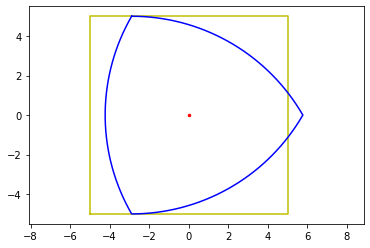

In [59]:
plt.plot(center[0], center[1], 'r.', markersize=5)
plt.plot(square[:,0], square[:,1], 'y-')
plt.plot(relo_matrix[:,0], relo_matrix[:,1], 'b-')
plt.axis('equal')

Треугольник Рело необходимо сдвинуть влево таким образом, чтобы он оказался вписанным в квадрат. Величину вектора сдвига <code>shift</code> $\color{red}{определите}$ $\color{red}{самостоятельно}$.

In [60]:
shift = np.array([r / (2 * math.sin(math.pi / n)) - r / 2, 0])
shift

array([0.77350269, 0.        ])

In [61]:
center -= shift
relo_matrix_shifted = relo_matrix - shift

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

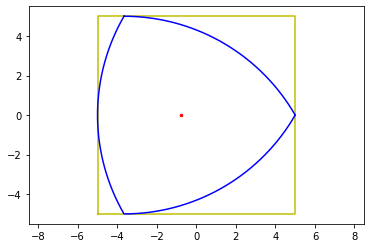

In [62]:
plt.plot(center[0], center[1], 'r.', markersize=5)
plt.plot(square[:,0], square[:,1], 'y-')
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'b-')
plt.axis('equal')